In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['BP']=label.fit_transform(df['BP'])
df['Cholesterol']=label.fit_transform(df['Cholesterol'])


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [19]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [20]:
cmap={'drugA':0,'drugB':1,'drugC':2,'drugY':3,'drugX':4}
df['drug_num']=df['Drug'].map(cmap)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,drug_num
0,23,0,0,0,25.355,drugY,3
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,4
4,61,0,1,0,18.043,drugY,3
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,4
198,23,1,2,1,14.020,drugX,4


In [22]:
X=df.drop(['Drug','drug_num'],axis=1)
y=df['Drug']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
drug_tree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
drug_tree.fit(X_train,y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
pred=drug_tree.predict(X_test)
metrics.accuracy_score(y_test,pred)

1.0

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.966\nsamples = 140\nvalue = [16, 13, 10, 36, 65]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.81\nsamples = 75\nvalue = [16, 13, 10, 36, 0]'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.992\nsamples = 29\nvalue = [16, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.755\nsamples = 46\nvalue = [0, 0, 10, 36, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 10, 11, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 65\nvalue = [0, 0, 0, 0, 65]'),
 Text(0.6875, 0.8, '  False')]

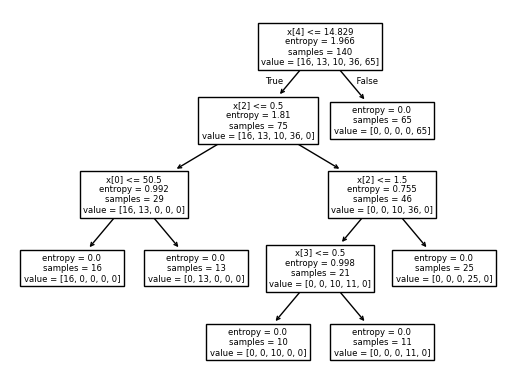

In [28]:
plot_tree(drug_tree)